# ***1-importing Libraries to use***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster import KElbowVisualizer ,silhouette_visualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

# ***2-read data_set***

In [2]:
data= pd.read_csv("/kaggle/input/credit-card/credit card.csv")

# ***3-Data Exploration***

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# ***4-preprocessing***

In [5]:
data.drop(columns=['CUST_ID'], inplace =True)


In [6]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median() , inplace= True)

In [7]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median() , inplace= True)

In [8]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
col=data.columns.tolist
print(col)

<bound method IndexOpsMixin.tolist of Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')>


In [11]:
scaler= StandardScaler()
data_scaler= scaler.fit_transform(data)
data_scaler

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

# ***5-PCA model***

In [12]:
model= PCA()

In [13]:
model.fit(data_scaler)

PCA()

Text(0, 0.5, 'variance')

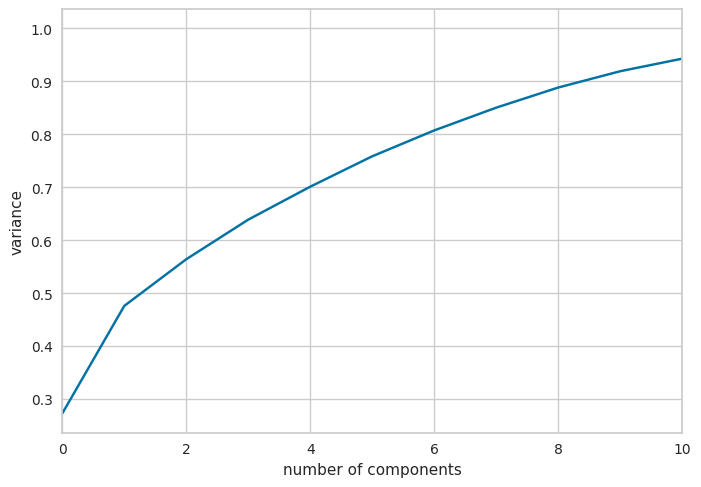

In [14]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlim(0,10,-1)
plt.xlabel("number of components")
plt.ylabel("variance")

# ***6-fiting PCA model***

In [15]:
pca_model =PCA(n_components=10 )

In [16]:
pca_data= pca_model.fit_transform(data_scaler)

In [17]:
pca_data

array([[-1.68364879e+00, -1.07224148e+00,  4.75660084e-01, ...,
        -1.89517812e-02,  1.18335937e-01, -7.81956004e-02],
       [-1.13408493e+00,  2.50914981e+00,  6.02216308e-01, ...,
         1.76153547e-01,  6.74472271e-01, -7.77929470e-01],
       [ 9.69394988e-01, -3.83576903e-01,  9.09697616e-02, ...,
        -2.29364329e-01, -8.67802735e-01, -1.74404835e-03],
       ...,
       [-9.28985122e-01, -1.80804835e+00, -4.58242377e-01, ...,
        -2.92831922e-01,  8.10029122e-01, -8.30135631e-01],
       [-2.33784475e+00, -6.53611332e-01,  9.82831153e-01, ...,
         2.30862515e-01,  1.20567473e+00,  2.68662638e-01],
       [-5.58026533e-01, -4.00646098e-01,  1.03364560e+00, ...,
        -4.04444715e-01, -8.31975961e-01,  3.46160674e-01]])

# ***7-KElbowVisualizer***

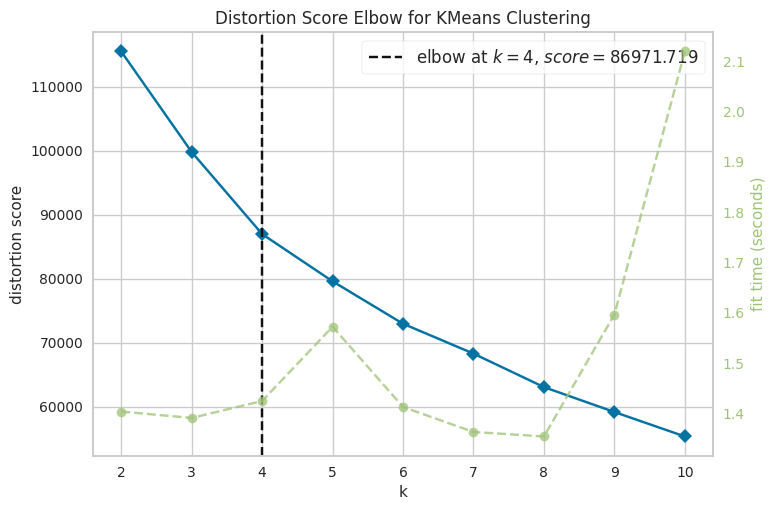

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
elbow = KElbowVisualizer(KMeans(), k = 10)
elbow.fit(pca_data)
elbow.show()

# ***8-SilhouetteVisualizer***

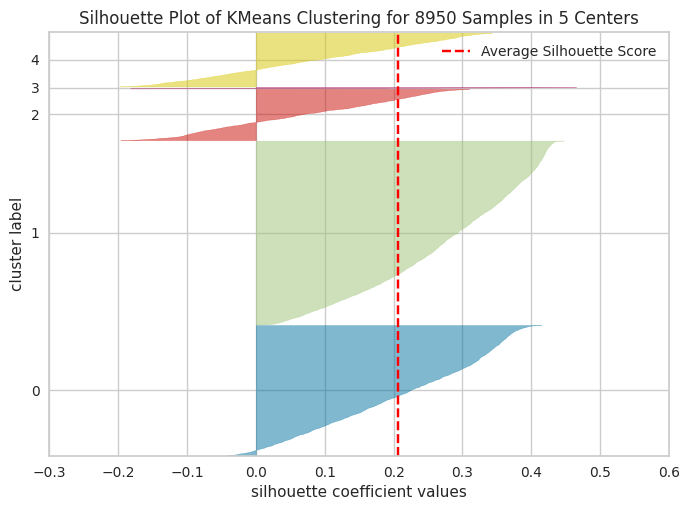

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(pca_data)  # Fit the data to the visualizer
visualizer.show()  

# ***9-KMeans model***

In [20]:
wccs=[]
k_range= range(1,10)
for i in k_range:
    k_modelmeans =KMeans(n_clusters=i)
    k_modelmeans.fit(pca_data)
    wccs.append(k_modelmeans.inertia_)


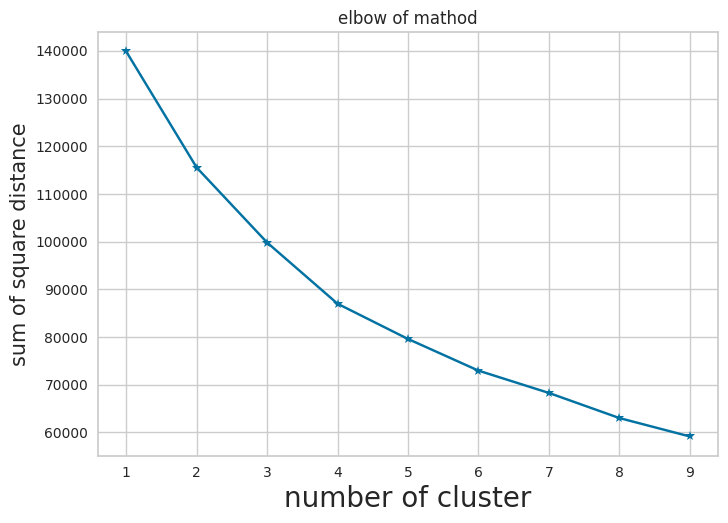

In [21]:
plt.plot(k_range, wccs, marker='*')
plt.title("elbow of mathod")
plt.xlabel("number of cluster", fontsize=20)
plt.ylabel("sum of square distance" ,fontsize= 15)
plt.show()

In [22]:
s=[]
sil=[]
k_range = range(2, 10)
for i in k_range:
    k_model = KMeans(n_clusters= i, random_state=42)
    y_pred = k_model.fit_predict(pca_data) 
    s.append(k_model.inertia_)
    sil.append(silhouette_score(pca_data, y_pred))
    print("k =", i,":" , k_model.inertia_)
    print("silhouette_score %0.4f" % silhouette_score(pca_data, y_pred))

k = 2 : 115531.22458591935
silhouette_score 0.2247
k = 3 : 99804.70707775706
silhouette_score 0.2586
k = 4 : 86971.50600781466
silhouette_score 0.2169
k = 5 : 79859.16341191232
silhouette_score 0.2070
k = 6 : 72943.96470922283
silhouette_score 0.2235
k = 7 : 67615.26158224384
silhouette_score 0.2385
k = 8 : 63006.73936091435
silhouette_score 0.2447
k = 9 : 58471.93346261979
silhouette_score 0.2489


# ***10-fiting KMeans model***

In [23]:
k_modelm =KMeans(n_clusters=3, random_state=42)
k_modelm.fit(pca_data)
pred = k_modelm.predict(pca_data)

# ***11-clusterig data***

In [25]:
data['cluster'] = pred
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [26]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]


In [27]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.0,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.00,12,0
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.0,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.25,12,0
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.0,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.00,12,0
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.0,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.00,12,0
34,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.0,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.00,12,0


In [28]:
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.0,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.0,12,1


In [29]:
df3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,2
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,2
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,2
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,2


# ***12-ploting clusterig and reshabe data***

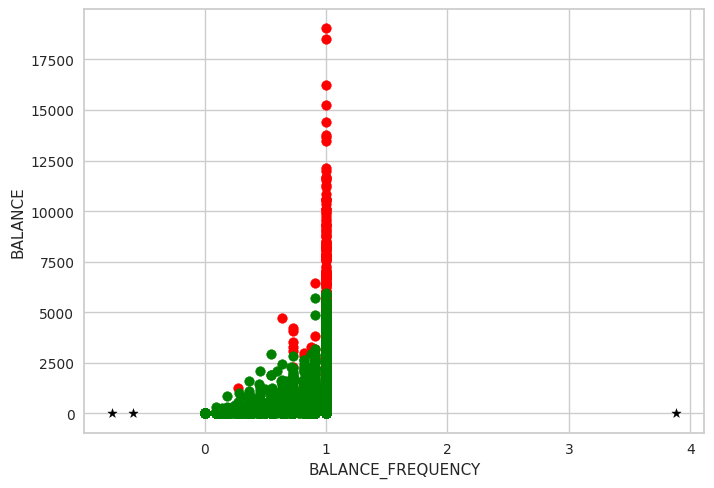

In [30]:
plt.scatter(df1.BALANCE_FREQUENCY, df1['BALANCE'], color = "red")
plt.scatter(df2.BALANCE_FREQUENCY, df2['BALANCE'], color = "green")
plt.scatter(k_modelm.cluster_centers_[:,0],k_modelm.cluster_centers_[:,1], color ='black', marker='*')
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel("BALANCE")
plt.show()

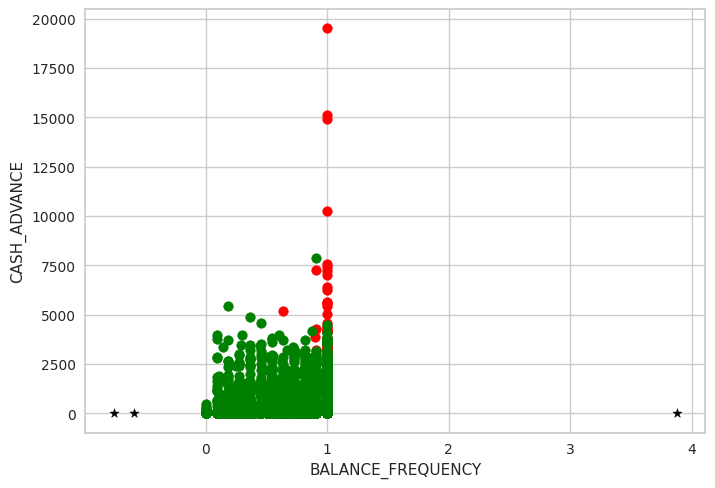

In [31]:
plt.scatter(df1.BALANCE_FREQUENCY, df1['CASH_ADVANCE'], color = "red")
plt.scatter(df2.BALANCE_FREQUENCY, df2['CASH_ADVANCE'], color = "green")
plt.scatter(k_modelm.cluster_centers_[:,0],k_modelm.cluster_centers_[:,1], color ='black', marker='*')
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel("CASH_ADVANCE")
plt.show()

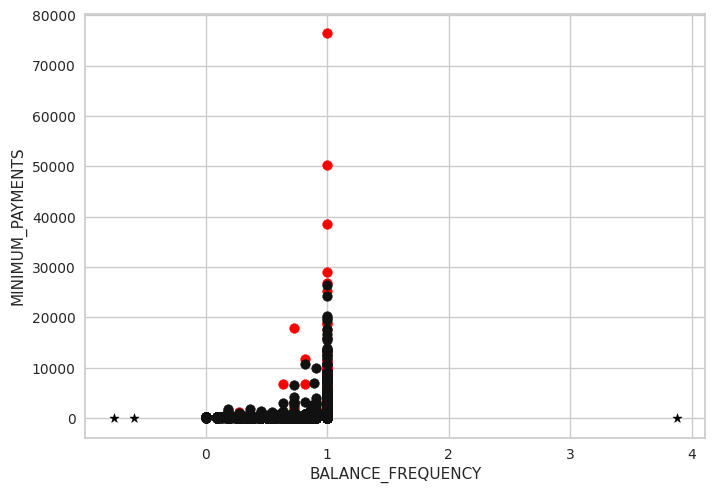

In [33]:
plt.scatter(df1.BALANCE_FREQUENCY, df1['MINIMUM_PAYMENTS'], color = "red")
plt.scatter(df2.BALANCE_FREQUENCY, df2['MINIMUM_PAYMENTS'], color = "k")
plt.scatter(k_modelm.cluster_centers_[:,0],k_modelm.cluster_centers_[:,1], color ='black', marker='*')
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel("MINIMUM_PAYMENTS")
plt.show()

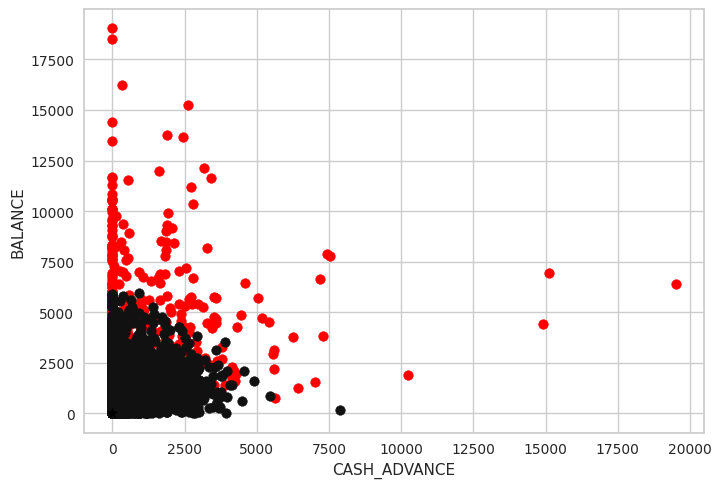

In [34]:
plt.scatter(df1.CASH_ADVANCE, df1['BALANCE'], color = "red")
plt.scatter(df2.CASH_ADVANCE, df2['BALANCE'], color = "k")
plt.scatter(k_modelm.cluster_centers_[:,0],k_modelm.cluster_centers_[:,1], color ='black', marker='*')
plt.xlabel('CASH_ADVANCE')
plt.ylabel("BALANCE")
plt.show()

In [35]:
k_modelm.cluster_centers_

array([[ 3.88167054e+00, -1.60341566e-01,  9.88588117e-02,
         9.06696034e-02, -3.16007804e-01,  8.35564108e-03,
        -1.66061711e-01, -5.84726860e-02, -1.68990579e-01,
         2.66413738e-01],
       [-5.88746676e-01, -7.46384737e-01,  4.70832494e-02,
         5.68946185e-02,  6.36405306e-02,  3.09932811e-02,
         7.23745892e-02,  5.08005762e-04,  2.56052391e-02,
        -7.90613447e-02],
       [-7.59911319e-01,  2.97219731e+00, -2.56225170e-01,
        -2.87320133e-01,  1.91734880e-03, -1.24733884e-01,
        -1.47545187e-01,  4.33496086e-02,  3.31829553e-02,
         9.53358649e-02]])

# ***If you liked this notebook, please do upvote***

 This study was carried out by novice who have just entered the world of machine learning. Any questions, suggestions, criticism or feedback are highly appreciated.

# ***Thank You***
